In [18]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏

In [9]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv('chi_square_data_6-20.csv')

In [14]:
# Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏
print("=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===")
print(f"\nÎç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df.shape}")
print(f"Ï¥ù Í¥ÄÏ∏°Ïπò: {len(df):,}Í∞ú")

print("\nÏª¨Îüº Ï†ïÎ≥¥:")
print(df.info())

print("\nÏ≤´ 10Í∞ú Ìñâ ÌôïÏù∏:")
display(df.head(10))

print("\nÍ∞Å Ïª¨ÎüºÏùò Í≥†Ïú†Í∞í ÌôïÏù∏:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count}Í∞ú Í≥†Ïú†Í∞í")
    if unique_count < 10: # Í≥†Ïú†Í∞íÏù¥ 10Í∞ú ÎØ∏ÎßåÏù∏ Í≤ΩÏö∞ ÏÉÅÏÑ∏ ÌôïÏù∏
        print(f"  - Í≥†Ïú†Í∞í ÏÉÅÏÑ∏: {df[col].unique()}")

=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===

Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (900000, 4)
Ï¥ù Í¥ÄÏ∏°Ïπò: 900,000Í∞ú

Ïª¨Îüº Ï†ïÎ≥¥:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   stage       900000 non-null  object
 1   passed      900000 non-null  int64 
 2   user_id     900000 non-null  int64 
 3   group_type  900000 non-null  object
dtypes: int64(2), object(2)
memory usage: 27.5+ MB
None

Ï≤´ 10Í∞ú Ìñâ ÌôïÏù∏:


stage  passed  user_id group_type
0  6-20       1   527985     ÏµúÏ†ÅÏùò Ï°∞Ìï©
1  6-20       1   618094     ÏµúÏ†ÅÏùò Ï°∞Ìï©
2  6-20       1   484218     ÏµúÏ†ÅÏùò Ï°∞Ìï©
3  6-20       1   161124     ÏµúÏ†ÅÏùò Ï°∞Ìï©
4  6-20       1   718643    ÎπÑÌö®Ïú®Ï†Å Ï°∞Ìï©
5  6-20       1   234836     ÏµúÏ†ÅÏùò Ï°∞Ìï©
6  6-20       0   484014    ÎπÑÌö®Ïú®Ï†Å Ï°∞Ìï©
7  6-20       1   555954     ÏµúÏ†ÅÏùò Ï°∞Ìï©
8  6-20       0   282984     Ï§ÄÏµúÏ†Å Ï°∞Ìï©
9  6-20       1   619022     ÏµúÏ†ÅÏùò Ï°∞Ìï©


Í∞Å Ïª¨ÎüºÏùò Í≥†Ïú†Í∞í ÌôïÏù∏:
stage: 1Í∞ú Í≥†Ïú†Í∞í
  - Í≥†Ïú†Í∞í ÏÉÅÏÑ∏: ['6-20']
passed: 2Í∞ú Í≥†Ïú†Í∞í
  - Í≥†Ïú†Í∞í ÏÉÅÏÑ∏: [1 0]
user_id: 900000Í∞ú Í≥†Ïú†Í∞í
group_type: 3Í∞ú Í≥†Ïú†Í∞í
  - Í≥†Ïú†Í∞í ÏÉÅÏÑ∏: ['ÏµúÏ†ÅÏùò Ï°∞Ìï©' 'ÎπÑÌö®Ïú®Ï†Å Ï°∞Ìï©' 'Ï§ÄÏµúÏ†Å Ï°∞Ìï©']


### 2. Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Í≤ÄÏ¶ù Î∞è Ï†ÑÏ≤òÎ¶¨
90Îßå Í∞ú Îç∞Ïù¥ÌÑ∞ ÏôÑÏ†ïÏÑ± Í≤ÄÏ¶ù

In [15]:
def validate_and_clean_data(df):
    """Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Í≤ÄÏ¶ù Î∞è Ï†ïÏ†ú"""
    
    print("=== Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Í≤ÄÏ¶ù ===")
    
    # Í≤∞Ï∏°Í∞í ÌôïÏù∏
    missing_info = df.isnull().sum()
    print("Í≤∞Ï∏°Í∞í ÌòÑÌô©:")
    print(missing_info)
    
    if missing_info.sum() > 0:
        print("‚ö†Ô∏è Í≤∞Ï∏°Í∞í Î∞úÍ≤¨. Ìï¥Îãπ ÌñâÏùÑ Ï†úÍ±∞Ìï©ÎãàÎã§.")
        df_clean = df.dropna()
        print(f"Í≤∞Ï∏°Í∞í Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_clean.shape}")
    else:
        print("‚úÖ Í≤∞Ï∏°Í∞íÏù¥ ÏóÜÏäµÎãàÎã§.")
        df_clean = df.copy()
    
    # Ï§ëÎ≥µ user_id ÌôïÏù∏ (Í∞Å Ïú†Ï†ÄÎäî Í≥†Ïú†Ìï¥Ïïº Ìï®)
    duplicate_users = df_clean[df_clean.duplicated(subset=['user_id'])]
    if len(duplicate_users) > 0:
        print(f"‚ö†Ô∏è Ï§ëÎ≥µ user_id Î∞úÍ≤¨: {len(duplicate_users):,}Í∞ú")
        print("Ï≤´ Î≤àÏß∏ Í∏∞Î°ùÎßå Ïú†ÏßÄÌï©ÎãàÎã§.")
        df_clean = df_clean.drop_duplicates(subset=['user_id'], keep='first')
        print(f"Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_clean.shape}")
    else:
        print("‚úÖ Ï§ëÎ≥µ user_idÍ∞Ä ÏóÜÏäµÎãàÎã§.")
    
    # Î≥ÄÏàò Í∞í Î≤îÏúÑ ÌôïÏù∏
    print(f"\n=== Î≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏ ===")
    print(f"stage Î≤îÏúÑ: {df_clean['stage'].unique()}")
    print(f"passed Í∞í: {df_clean['passed'].unique()}")
    print(f"group_type Î≤îÏ£º: {df_clean['group_type'].unique()}")
    
    # passed Í∞íÏù¥ 0, 1Ïù∏ÏßÄ ÌôïÏù∏
    if not set(df_clean['passed'].unique()).issubset({0, 1}):
        print("‚ùå passed Ïª¨ÎüºÏù¥ 0, 1 Í∞íÎßå Ìè¨Ìï®ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
        return None
    
    return df_clean

# Îç∞Ïù¥ÌÑ∞ Í≤ÄÏ¶ù Î∞è Ï†ïÏ†ú
df_clean = validate_and_clean_data(df)

if df_clean is None:
    print("Îç∞Ïù¥ÌÑ∞ Í≤ÄÏ¶ù Ïã§Ìå®. Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïãú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
else:
    print(f"‚úÖ ÏµúÏ¢Ö Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞: {len(df_clean):,}Í∞ú Ìñâ")


=== Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Í≤ÄÏ¶ù ===
Í≤∞Ï∏°Í∞í ÌòÑÌô©:
stage         0
passed        0
user_id       0
group_type    0
dtype: int64
‚úÖ Í≤∞Ï∏°Í∞íÏù¥ ÏóÜÏäµÎãàÎã§.
‚úÖ Ï§ëÎ≥µ user_idÍ∞Ä ÏóÜÏäµÎãàÎã§.

=== Î≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏ ===
stage Î≤îÏúÑ: ['6-20']
passed Í∞í: [1 0]
group_type Î≤îÏ£º: ['ÏµúÏ†ÅÏùò Ï°∞Ìï©' 'ÎπÑÌö®Ïú®Ï†Å Ï°∞Ìï©' 'Ï§ÄÏµúÏ†Å Ï°∞Ìï©']
‚úÖ ÏµúÏ¢Ö Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞: 900,000Í∞ú Ìñâ


### 3. EDA
Ï°∞Ìï©Î≥Ñ ÌÜµÍ≥ºÏú® Ï∞®Ïù¥ ÌôïÏù∏

In [16]:
def exploratory_analysis(df):
    """ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù"""
    
    print("=== ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ===")
    
    # Í∏∞Î≥∏ ÍµêÏ∞®Ìëú ÏÉùÏÑ±
    crosstab = pd.crosstab(df['group_type'], df['passed'], margins=True)
    print("ÍµêÏ∞®Ìëú (Í¥ÄÏ∏° ÎπàÎèÑ):")
    print(crosstab)
    
    # Ï°∞Ìï©Î≥Ñ ÌÜµÍ≥ºÏú® Í≥ÑÏÇ∞
    pass_rates = df.groupby('group_type')['passed'].agg(['count', 'sum', 'mean'])
    pass_rates.columns = ['Ï¥ù_ÏÇ¨Ïö©ÏûêÏàò', 'ÌÜµÍ≥ºÏûêÏàò', 'ÌÜµÍ≥ºÏú®']
    pass_rates['Ïù¥ÌÉàÏûêÏàò'] = pass_rates['Ï¥ù_ÏÇ¨Ïö©ÏûêÏàò'] - pass_rates['ÌÜµÍ≥ºÏûêÏàò']
    pass_rates['Ïù¥ÌÉàÏú®'] = 1 - pass_rates['ÌÜµÍ≥ºÏú®']
    
    print(f"\nÏ°∞Ìï©Î≥Ñ ÏÉÅÏÑ∏ ÌÜµÍ≥Ñ:")
    for group in pass_rates.index:
        stats = pass_rates.loc[group]
        print(f"{group}:")
        print(f"  Ï¥ù ÏÇ¨Ïö©Ïûê: {stats['Ï¥ù_ÏÇ¨Ïö©ÏûêÏàò']:,}Î™Ö")
        print(f"  ÌÜµÍ≥ºÏûê: {stats['ÌÜµÍ≥ºÏûêÏàò']:,}Î™Ö ({stats['ÌÜµÍ≥ºÏú®']:.1%})")
        print(f"  Ïù¥ÌÉàÏûê: {stats['Ïù¥ÌÉàÏûêÏàò']:,}Î™Ö ({stats['Ïù¥ÌÉàÏú®']:.1%})")
    
    # Ï†ÑÏ≤¥ ÌÜµÍ≥ºÏú®
    overall_pass_rate = df['passed'].mean()
    print(f"\nÏ†ÑÏ≤¥ ÌÜµÍ≥ºÏú®: {overall_pass_rate:.1%}")
    print(f"Ï†ÑÏ≤¥ Ïù¥ÌÉàÏú®: {1-overall_pass_rate:.1%}")
    
    return crosstab, pass_rates

# ÌÉêÏÉâÏ†Å Î∂ÑÏÑù ÏàòÌñâ
crosstab, pass_rates = exploratory_analysis(df_clean)


=== ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ===
ÍµêÏ∞®Ìëú (Í¥ÄÏ∏° ÎπàÎèÑ):
passed           0       1     All
group_type                        
ÎπÑÌö®Ïú®Ï†Å Ï°∞Ìï©     149782   55292  205074
Ï§ÄÏµúÏ†Å Ï°∞Ìï©       66280  176527  242807
ÏµúÏ†ÅÏùò Ï°∞Ìï©       25793  426326  452119
All         241855  658145  900000

Ï°∞Ìï©Î≥Ñ ÏÉÅÏÑ∏ ÌÜµÍ≥Ñ:
ÎπÑÌö®Ïú®Ï†Å Ï°∞Ìï©:
  Ï¥ù ÏÇ¨Ïö©Ïûê: 205,074.0Î™Ö
  ÌÜµÍ≥ºÏûê: 55,292.0Î™Ö (27.0%)
  Ïù¥ÌÉàÏûê: 149,782.0Î™Ö (73.0%)
Ï§ÄÏµúÏ†Å Ï°∞Ìï©:
  Ï¥ù ÏÇ¨Ïö©Ïûê: 242,807.0Î™Ö
  ÌÜµÍ≥ºÏûê: 176,527.0Î™Ö (72.7%)
  Ïù¥ÌÉàÏûê: 66,280.0Î™Ö (27.3%)
ÏµúÏ†ÅÏùò Ï°∞Ìï©:
  Ï¥ù ÏÇ¨Ïö©Ïûê: 452,119.0Î™Ö
  ÌÜµÍ≥ºÏûê: 426,326.0Î™Ö (94.3%)
  Ïù¥ÌÉàÏûê: 25,793.0Î™Ö (5.7%)

Ï†ÑÏ≤¥ ÌÜµÍ≥ºÏú®: 73.1%
Ï†ÑÏ≤¥ Ïù¥ÌÉàÏú®: 26.9%


### 4. ÏãúÍ∞ÅÌôî

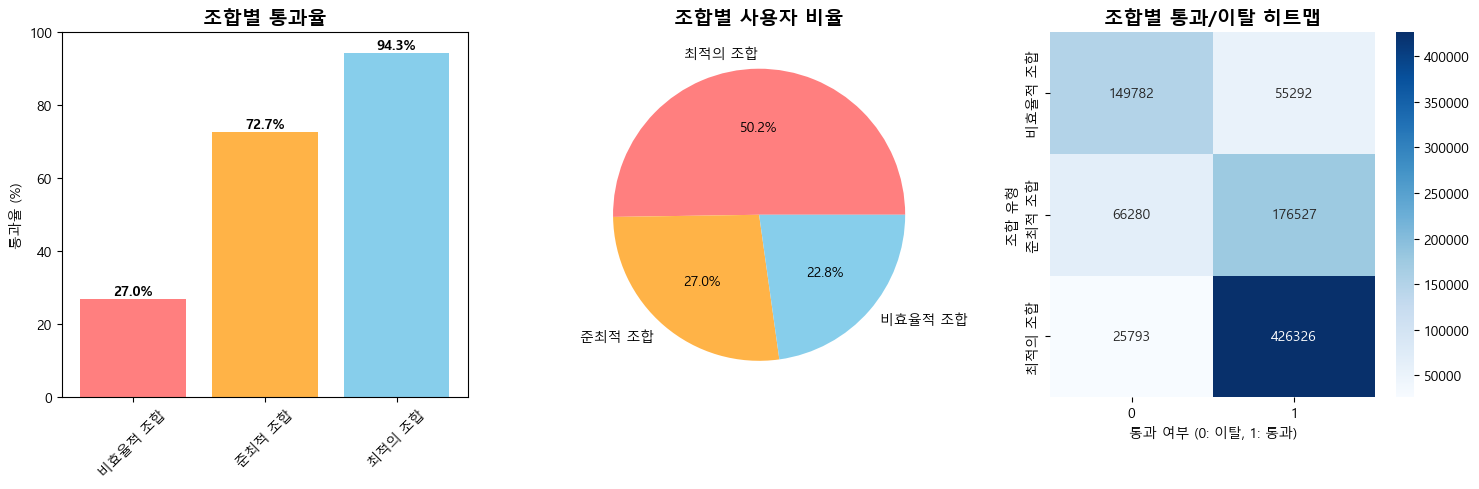

In [19]:
def create_visualizations(df, pass_rates):
    """Ï£ºÏöî Í≤∞Í≥º ÏãúÍ∞ÅÌôî"""
    
    plt.figure(figsize=(15, 5))
    
    # 1. Ï°∞Ìï©Î≥Ñ ÌÜµÍ≥ºÏú® ÎßâÎåÄÍ∑∏ÎûòÌîÑ
    plt.subplot(1, 3, 1)
    groups = pass_rates.index
    pass_rate_pct = pass_rates['ÌÜµÍ≥ºÏú®'] * 100
    bars = plt.bar(groups, pass_rate_pct, color=['#ff7f7f', '#ffb347', '#87ceeb'])
    plt.title('Ï°∞Ìï©Î≥Ñ ÌÜµÍ≥ºÏú®', fontsize=14, fontweight='bold')
    plt.ylabel('ÌÜµÍ≥ºÏú® (%)')
    plt.ylim(0, 100)
    
    # ÎßâÎåÄ ÏúÑÏóê ÏàòÏπò ÌëúÏãú
    for bar, rate in zip(bars, pass_rate_pct):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{rate:.1f}%', ha='center', fontweight='bold')
    
    plt.xticks(rotation=45)
    
    # 2. Ï°∞Ìï©Î≥Ñ ÏÇ¨Ïö©Ïûê Î∂ÑÌè¨ ÌååÏù¥Ï∞®Ìä∏
    plt.subplot(1, 3, 2)
    group_counts = df['group_type'].value_counts()
    plt.pie(group_counts.values, labels=group_counts.index, autopct='%1.1f%%',
            colors=['#ff7f7f', '#ffb347', '#87ceeb'])
    plt.title('Ï°∞Ìï©Î≥Ñ ÏÇ¨Ïö©Ïûê ÎπÑÏú®', fontsize=14, fontweight='bold')
    
    # 3. ÌûàÌä∏Îßµ
    plt.subplot(1, 3, 3)
    crosstab_for_heatmap = pd.crosstab(df['group_type'], df['passed'])
    sns.heatmap(crosstab_for_heatmap, annot=True, fmt='d', cmap='Blues')
    plt.title('Ï°∞Ìï©Î≥Ñ ÌÜµÍ≥º/Ïù¥ÌÉà ÌûàÌä∏Îßµ', fontsize=14, fontweight='bold')
    plt.xlabel('ÌÜµÍ≥º Ïó¨Î∂Ä (0: Ïù¥ÌÉà, 1: ÌÜµÍ≥º)')
    plt.ylabel('Ï°∞Ìï© Ïú†Ìòï')
    
    plt.tight_layout()
    plt.show()

# ÏãúÍ∞ÅÌôî ÏÉùÏÑ±
create_visualizations(df_clean, pass_rates)


### 5. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í∞ÄÏ†ï ÌôïÏù∏

In [20]:
def check_chi_square_assumptions(crosstab):
    """Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í∞ÄÏ†ï ÌôïÏù∏"""
    
    print("=== Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í∞ÄÏ†ï ÌôïÏù∏ ===")
    
    # ÍµêÏ∞®ÌëúÏóêÏÑú margin Ï†úÍ±∞ (All Ìñâ/Ïó¥ Ï†úÍ±∞)
    observed = crosstab.iloc[:-1, :-1]  # ÎßàÏßÄÎßâ ÌñâÍ≥º Ïó¥(All) Ï†úÍ±∞
    
    # Í∏∞ÎåÄÎπàÎèÑ Í≥ÑÏÇ∞
    chi2, p, dof, expected = chi2_contingency(observed)
    
    print("Í¥ÄÏ∏° ÎπàÎèÑÌëú:")
    print(observed)
    
    expected_df = pd.DataFrame(expected, 
                              index=observed.index, 
                              columns=observed.columns)
    print(f"\nÍ∏∞ÎåÄ ÎπàÎèÑÌëú:")
    print(expected_df.round(2))
    
    # Í∞ÄÏ†ï ÌôïÏù∏
    print(f"\n‚úÖ Í∞ÄÏ†ï 1 - Í¥ÄÏ∏°ÏπòÏùò ÎèÖÎ¶ΩÏÑ±:")
    print(f"   Í∞Å user_idÎäî Í≥†Ïú†ÌïòÎØÄÎ°ú ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï Ï∂©Ï°±")
    
    print(f"\n‚úÖ Í∞ÄÏ†ï 2 - Í∏∞ÎåÄÎπàÎèÑ Ï°∞Í±¥:")
    min_expected = expected.min()
    cells_below_5 = (expected < 5).sum()
    total_cells = expected.size
    
    print(f"   ÏµúÏÜå Í∏∞ÎåÄÎπàÎèÑ: {min_expected:.2f}")
    print(f"   Í∏∞ÎåÄÎπàÎèÑ 5 ÎØ∏ÎßåÏù∏ ÏÖÄ: {cells_below_5}/{total_cells}")
    
    if min_expected >= 5:
        print("   ‚úÖ Î™®Îì† ÏÖÄÏùò Í∏∞ÎåÄÎπàÎèÑÍ∞Ä 5 Ïù¥ÏÉÅÏûÖÎãàÎã§.")
        assumption_met = True
    else:
        print("   ‚ùå ÏùºÎ∂Ä ÏÖÄÏùò Í∏∞ÎåÄÎπàÎèÑÍ∞Ä 5 ÎØ∏ÎßåÏûÖÎãàÎã§.")
        assumption_met = False
    
    print(f"\n‚úÖ Í∞ÄÏ†ï 3 - ÌëúÎ≥∏ ÌÅ¨Í∏∞:")
    print(f"   Ï¥ù ÌëúÎ≥∏: {observed.sum().sum():,}Í∞ú (Ï∂©Î∂ÑÌï®)")
    
    return observed, expected_df, assumption_met

# Í∞ÄÏ†ï ÌôïÏù∏
observed, expected_df, assumptions_met = check_chi_square_assumptions(crosstab)


=== Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í∞ÄÏ†ï ÌôïÏù∏ ===
Í¥ÄÏ∏° ÎπàÎèÑÌëú:
passed           0       1
group_type                
ÎπÑÌö®Ïú®Ï†Å Ï°∞Ìï©     149782   55292
Ï§ÄÏµúÏ†Å Ï°∞Ìï©       66280  176527
ÏµúÏ†ÅÏùò Ï°∞Ìï©       25793  426326

Í∏∞ÎåÄ ÎπàÎèÑÌëú:
passed              0          1
group_type                      
ÎπÑÌö®Ïú®Ï†Å Ï°∞Ìï©      55109.08  149964.92
Ï§ÄÏµúÏ†Å Ï°∞Ìï©       65248.99  177558.01
ÏµúÏ†ÅÏùò Ï°∞Ìï©      121496.93  330622.07

‚úÖ Í∞ÄÏ†ï 1 - Í¥ÄÏ∏°ÏπòÏùò ÎèÖÎ¶ΩÏÑ±:
   Í∞Å user_idÎäî Í≥†Ïú†ÌïòÎØÄÎ°ú ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï Ï∂©Ï°±

‚úÖ Í∞ÄÏ†ï 2 - Í∏∞ÎåÄÎπàÎèÑ Ï°∞Í±¥:
   ÏµúÏÜå Í∏∞ÎåÄÎπàÎèÑ: 55109.08
   Í∏∞ÎåÄÎπàÎèÑ 5 ÎØ∏ÎßåÏù∏ ÏÖÄ: 0/6
   ‚úÖ Î™®Îì† ÏÖÄÏùò Í∏∞ÎåÄÎπàÎèÑÍ∞Ä 5 Ïù¥ÏÉÅÏûÖÎãàÎã§.

‚úÖ Í∞ÄÏ†ï 3 - ÌëúÎ≥∏ ÌÅ¨Í∏∞:
   Ï¥ù ÌëúÎ≥∏: 900,000Í∞ú (Ï∂©Î∂ÑÌï®)


### 6. Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï ÏàòÌñâ
Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ ÌÜµÌïú Ïó∞Í¥ÄÏÑ± Ï°¥Ïû¨ ÌôïÏù∏

In [21]:
def perform_chi_square_test(observed):
    """Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï ÏàòÌñâ"""
    
    print("=== Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï Í≤∞Í≥º ===")
    
    # Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ÏàòÌñâ
    chi2_stat, p_value, dof, expected = chi2_contingency(observed)
    
    print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ (œá¬≤): {chi2_stat:.6f}")
    print(f"ÏûêÏú†ÎèÑ (df): {dof}")
    print(f"p-value: {p_value:.2e}")
    
    # ÏûÑÍ≥ÑÍ∞í Í≥ÑÏÇ∞
    from scipy.stats import chi2
    alpha = 0.05
    critical_value = chi2.ppf(1 - alpha, dof)
    print(f"ÏûÑÍ≥ÑÍ∞í (Œ±=0.05): {critical_value:.6f}")
    
    # Í≤ÄÏ†ï Í≤∞Í≥º Ìï¥ÏÑù
    print(f"\n=== Í≤ÄÏ†ï Í≤∞Í≥º Ìï¥ÏÑù ===")
    if p_value < alpha:
        print(f"‚úÖ p-value ({p_value:.2e}) < Œ± ({alpha})")
        print(f"‚úÖ œá¬≤ ÌÜµÍ≥ÑÎüâ ({chi2_stat:.6f}) > ÏûÑÍ≥ÑÍ∞í ({critical_value:.6f})")
        print("üìä Í≤∞Î°†: Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§.")
        print("   ‚Üí Ï°∞Ìï© Ïú†ÌòïÍ≥º ÌÜµÍ≥º/Ïù¥ÌÉà Í∞ÑÏóê ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú Ïó∞Í¥ÄÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§.")
        print("   ‚Üí Ïπ¥Ïö¥ÌÑ∞ Ï°∞Ìï©Ïóê ÎåÄÌïú Ïù¥Ìï¥ Î∂ÄÏ°±Ïù¥ Ïù¥ÌÉàÎ•†Í≥º Í¥ÄÎ†®Ïù¥ ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏäµÎãàÎã§.")
        significant = True
    else:
        print(f"‚ùå p-value ({p_value:.6f}) ‚â• Œ± ({alpha})")
        print("üìä Í≤∞Î°†: Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
        print("   ‚Üí Ï°∞Ìï© Ïú†ÌòïÍ≥º ÌÜµÍ≥º/Ïù¥ÌÉà Í∞ÑÏóê ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú Ïó∞Í¥ÄÏÑ±Ïù¥ ÏóÜÏäµÎãàÎã§.")
        significant = False
    
    return chi2_stat, p_value, dof, significant

# Í≤ÄÏ†ï ÏàòÌñâ
if assumptions_met:
    chi2_stat, p_value, dof, significant = perform_chi_square_test(observed)
else:
    print("‚ö†Ô∏è ÌÜµÍ≥ÑÏ†Å Í∞ÄÏ†ïÏù¥ Ï∂©Ï°±ÎêòÏßÄ ÏïäÏïÑ Í≤ÄÏ†ï Í≤∞Í≥ºÏùò Ïã†Î¢∞ÏÑ±Ïù¥ ÎÇÆÏùÑ Ïàò ÏûàÏäµÎãàÎã§.")
    chi2_stat, p_value, dof, significant = perform_chi_square_test(observed)


=== Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï Í≤∞Í≥º ===
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ (œá¬≤): 325519.391834
ÏûêÏú†ÎèÑ (df): 2
p-value: 0.00e+00
ÏûÑÍ≥ÑÍ∞í (Œ±=0.05): 5.991465

=== Í≤ÄÏ†ï Í≤∞Í≥º Ìï¥ÏÑù ===
‚úÖ p-value (0.00e+00) < Œ± (0.05)
‚úÖ œá¬≤ ÌÜµÍ≥ÑÎüâ (325519.391834) > ÏûÑÍ≥ÑÍ∞í (5.991465)
üìä Í≤∞Î°†: Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§.
   ‚Üí Ï°∞Ìï© Ïú†ÌòïÍ≥º ÌÜµÍ≥º/Ïù¥ÌÉà Í∞ÑÏóê ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú Ïó∞Í¥ÄÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§.
   ‚Üí Ïπ¥Ïö¥ÌÑ∞ Ï°∞Ìï©Ïóê ÎåÄÌïú Ïù¥Ìï¥ Î∂ÄÏ°±Ïù¥ Ïù¥ÌÉàÎ•†Í≥º Í¥ÄÎ†®Ïù¥ ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏäµÎãàÎã§.


### 7. Ìö®Í≥º ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
Ïó∞Í¥ÄÏÑ±Ïùò Ïã§ÏßàÏ†Å ÏùòÎØ∏ ÌèâÍ∞Ä

In [22]:
def calculate_effect_size(chi2_stat, observed):
    """Ìö®Í≥º ÌÅ¨Í∏∞ (Cram√©r's V) Í≥ÑÏÇ∞"""
    
    print("=== Ìö®Í≥º ÌÅ¨Í∏∞ Î∂ÑÏÑù ===")
    
    n = observed.sum().sum()  # Ï¥ù Í¥ÄÏ∏°Ïπò Ïàò
    min_dim = min(observed.shape) - 1  # min(Ìñâ-1, Ïó¥-1)
    
    # Cram√©r's V Í≥ÑÏÇ∞
    cramers_v = np.sqrt(chi2_stat / (n * min_dim))
    
    print(f"Cram√©r's V: {cramers_v:.4f}")
    
    # Ìö®Í≥º ÌÅ¨Í∏∞ Ìï¥ÏÑù
    if cramers_v < 0.1:
        effect_interpretation = "ÏûëÏùÄ Ìö®Í≥º"
    elif cramers_v < 0.3:
        effect_interpretation = "Ï§ëÍ∞Ñ Ìö®Í≥º"
    elif cramers_v < 0.5:
        effect_interpretation = "ÌÅ∞ Ìö®Í≥º"
    else:
        effect_interpretation = "Îß§Ïö∞ ÌÅ∞ Ìö®Í≥º"
    
    print(f"Ìö®Í≥º ÌÅ¨Í∏∞ Ìï¥ÏÑù: {effect_interpretation}")
    
    # ÌëúÏ§ÄÌôî ÏûîÏ∞® Í≥ÑÏÇ∞ (Ïñ¥Îñ§ ÏÖÄÏù¥ ÌäπÌûà Í∏∞Ïó¨ÌïòÎäîÏßÄ ÌôïÏù∏)
    chi2, p, dof, expected = chi2_contingency(observed)
    std_residuals = (observed - expected) / np.sqrt(expected)
    
    print(f"\nÌëúÏ§ÄÌôî ÏûîÏ∞® (|Í∞í| > 2Ïù¥Î©¥ Ïú†ÏùòÌïú Ï∞®Ïù¥):")
    print(std_residuals.round(3))
    
    return cramers_v, effect_interpretation

# Ìö®Í≥º ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
if 'chi2_stat' in locals():
    cramers_v, effect_interpretation = calculate_effect_size(chi2_stat, observed)


=== Ìö®Í≥º ÌÅ¨Í∏∞ Î∂ÑÏÑù ===
Cram√©r's V: 0.6014
Ìö®Í≥º ÌÅ¨Í∏∞ Ìï¥ÏÑù: Îß§Ïö∞ ÌÅ∞ Ìö®Í≥º

ÌëúÏ§ÄÌôî ÏûîÏ∞® (|Í∞í| > 2Ïù¥Î©¥ Ïú†ÏùòÌïú Ï∞®Ïù¥):
passed            0        1
group_type                  
ÎπÑÌö®Ïú®Ï†Å Ï°∞Ìï©     403.287 -244.473
Ï§ÄÏµúÏ†Å Ï°∞Ìï©        4.036   -2.447
ÏµúÏ†ÅÏùò Ï°∞Ìï©     -274.566  166.442


### 8. Ï¢ÖÌï© Í≤∞Í≥º Ï†ïÎ¶¨

üîç Î∂ÑÏÑù Í∞úÏöî:
- Î∂ÑÏÑù ÎåÄÏÉÅ: Í≤åÏûÑ Îã®Í≥Ñ 6-20Ïùò Ïù¥ÌÉàÎ•† Î∂ÑÏÑù
- Ï¥ù Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞: 900,000Î™ÖÏùò ÌîåÎ†àÏù¥Ïñ¥
- Í≤ÄÏ†ï Î∞©Î≤ï: Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï

In [29]:
# Í∏∞Ïà† ÌÜµÍ≥Ñ ÌôïÏù∏
print(f"\nüìà Í∏∞Ïà† ÌÜµÍ≥Ñ:")
overall_pass_rate = df_clean['passed'].mean()
print(f"‚Ä¢ Ï†ÑÏ≤¥ ÌÜµÍ≥ºÏú®: {overall_pass_rate:.1%}")
    
for group in df['group_type'].unique():
    group_pass_rate = df_clean[df_clean['group_type'] == group]['passed'].mean()
    print(f"‚Ä¢ {group} ÌÜµÍ≥ºÏú®: {group_pass_rate:.1%}")


üìà Í∏∞Ïà† ÌÜµÍ≥Ñ:
‚Ä¢ Ï†ÑÏ≤¥ ÌÜµÍ≥ºÏú®: 73.1%
‚Ä¢ ÏµúÏ†ÅÏùò Ï°∞Ìï© ÌÜµÍ≥ºÏú®: 94.3%
‚Ä¢ ÎπÑÌö®Ïú®Ï†Å Ï°∞Ìï© ÌÜµÍ≥ºÏú®: 27.0%
‚Ä¢ Ï§ÄÏµúÏ†Å Ï°∞Ìï© ÌÜµÍ≥ºÏú®: 72.7%


üßÆ Í≤ÄÏ†ï Í≤∞Í≥º:

‚úÖ Í≤∞Î°†:
- ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±: Ïú†ÏùòÌï® (p < 0.05)
- Ï°∞Ìï© Ïú†ÌòïÍ≥º Ïù¥ÌÉàÎ•† Í∞ÑÏóê ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú Ïó∞Í¥ÄÏÑ±Ïù¥ ÏûàÏùå
- Ïπ¥Ïö¥ÌÑ∞ Ï°∞Ìï©Ïóê ÎåÄÌïú Ïù¥Ìï¥ Î∂ÄÏ°±Ïù¥ Ïù¥ÌÉàÎ•†Í≥º Í¥ÄÎ†®Ïù¥ ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå

üí° Îã§Ïùå Îã®Í≥Ñ TODO:
- Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î∂ÑÏÑùÏùÑ ÌÜµÌïú Ï†ïÎ∞ÄÌïú Ïù∏Í≥ºÍ¥ÄÍ≥Ñ Î∂ÑÏÑù ÏàòÌñâ
- ÌîåÎ†àÏù¥Ïñ¥ Î†àÎ≤®, Ï†ÑÌà¨Î†• Îì± ÌòºÎûÄÎ≥ÄÏàò ÌÜµÏ†ú Î∂ÑÏÑù
- ÎπÑÌö®Ïú®Ï†Å Ï°∞Ìï© ÏÇ¨Ïö©ÏûêÎ•º ÏúÑÌïú ÌäúÌÜ†Î¶¨Ïñº Í∞úÏÑ† Í≥†Î†§